# Kaggle 캐글

https://kaggle.com

캐글은 머신러닝 엔지니어가 레벨업 할 수 있는 던전이자, 사냥터입니다. 수많은 공개된 데이터셋과 각 데이터셋 별로 사람들이 분석한 결과들을 모아놓은 플랫폼이죠.

기업 및 단체에서 Prize를 걸고 데이터와 해결 과제를 등록하면, 데이터 사이언티스트들이 이를 해결하기 위해 모델을 개발하고 경쟁하기도 하는 플랫폼입니다.

## Colab에서 Kaggle 데이터셋 다운로드 방법

1. [Kaggle](https://www.kaggle.com) 회원가입
2. Account(계정) 페이지 진입 (https://www.kaggle.com/[사옹자이름]/account)
3. API - Create New API Token 클릭하고 kaggle.json 다운로드
4. 브라우저에서 json 파일을 열어 username 및 key 복사
5. 아래 코드에 자신의 username 및 key를 붙여넣어 환경변수 설정 실행

In [8]:
import os
os.environ['KAGGLE_USERNAME'] = 'sbkim12' # username
os.environ['KAGGLE_KEY'] = '' # key

## 광고 데이터셋 다운로드

1. Kaggle에서 원하는 데이터셋을 검색 (예: https://www.kaggle.com/ashydv/advertising-dataset)
2. [Copy API command] 버튼 클릭 (New Notebook 옆에 ... 버튼 클릭)
3. 코드 셀에 붙여넣고 실행! (맨 앞에 "!" 꼭 붙이는거 잊지 마세요!)



In [9]:
!kaggle datasets download -d ashydv/advertising-dataset

'kaggle'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


데이터셋 압축 해제

In [3]:
!unzip /content/advertising-dataset.zip

unzip:  cannot find either /content/advertising-dataset.zip or /content/advertising-dataset.zip.zip.


##  광고 데이터 예측 (Single-variable linear regression)

TV 광고 금액으로 Sales 예측하기

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


### 데이터셋 로드

In [12]:
df = pd.read_csv('data/advertising.csv')
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 데이터셋 크기 살펴보기

In [13]:
print(df.shape)

(200, 4)


### 데이터셋 살짝 살펴보기

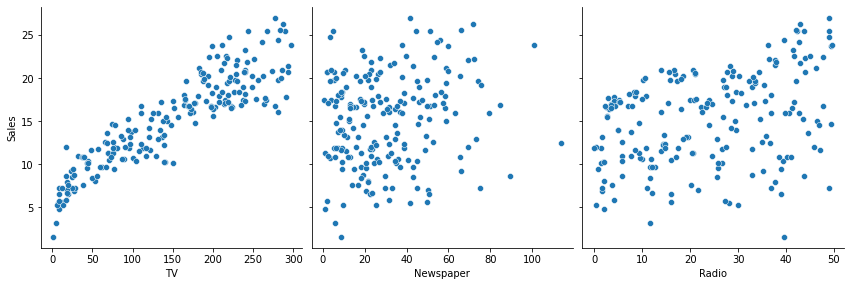

In [14]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=4)

### 데이터셋 가공

In [15]:
x_data = np.array(df[['TV']], dtype=np.float32)
y_data = np.array(df['Sales'], dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200,)


reshape(-1,1)
-1 => 이 자리의 수는 신경 쓰지 않음
1 => 이 자리의 수는 1로 함 

In [17]:
x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200, 1)


### 데이터셋 분할

학습 데이터 80%
검증 데이터 20%

참고) 강의에서는 편의를 위해 테스트 데이터를 나누지 않았습니다. 실무에서는 꼭 학습/검증/테시트 데이터를 나누는 것 잊지마세요!

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(160, 1) (40, 1)
(160, 1) (40, 1)


### 학습

In [21]:
model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

C:\Users\wleo5\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
5/5 [==============================] - 3s 183ms/step - loss: 81.7166 - val_loss: 67.5083
Epoch 2/100
5/5 [==============================] - 0s 27ms/step - loss: 48.4099 - val_loss: 43.5394
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 32.2741 - val_loss: 34.0678
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 26.4407 - val_loss: 35.3962
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 21.9201 - val_loss: 24.8560
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 18.5855 - val_loss: 22.4999
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 14.4844 - val_loss: 16.8724
Epoch 8/100
5/5 [==============================] - 0s 21ms/step - loss: 14.2527 - val_loss: 16.2809
Epoch 9/100
5/5 [==============================] - 0s 16ms/step - loss: 13.3150 - val_loss: 15.1129
Epoch 10/100
5/5 [==============================] - 0s 14ms/step - loss: 12.5799 - val_loss: 14.411

### 검증 데이터로 예측하기

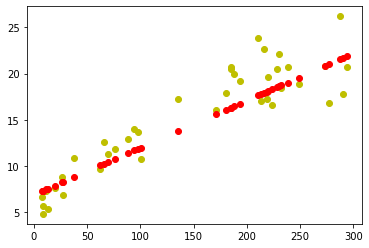

In [23]:
y_pred = model.predict(x_val)

plt.scatter(x_val, y_val, color='y')
plt.scatter(x_val, y_pred, color='r')
plt.show()

## 광고 데이터 예측하기 (Multi-variable linear regression)

TV, Newspaper, Radio 광고 금액으로 Sales 예측하기

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/advertising.csv')

x_data = np.array(df[['TV', 'Newspaper', 'Radio']], dtype=np.float32)
y_data = np.array(df['Sales'], dtype=np.float32)

x_data = x_data.reshape((-1, 3))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=100 # epochs 복수형으로 쓰기!
)

(200, 3)
(200, 1)
(160, 3) (40, 3)
(160, 1) (40, 1)
Epoch 1/100


C:\Users\wleo5\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5/5 [==============================] - 1s 99ms/step - loss: 26206.5039 - val_loss: 9789.1426
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 3802.6438 - val_loss: 630.8777
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 1232.1863 - val_loss: 2654.9441
Epoch 4/100
5/5 [==============================] - 0s 18ms/step - loss: 3288.8074 - val_loss: 3190.0247
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 2409.4370 - val_loss: 1057.6525
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 613.3969 - val_loss: 286.4267
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 424.8746 - val_loss: 691.2184
Epoch 8/100
5/5 [==============================] - 0s 20ms/step - loss: 650.2293 - val_loss: 528.3234
Epoch 9/100
5/5 [==============================] - 0s 17ms/step - loss: 339.0389 - val_loss: 155.0958
Epoch 10/100
5/5 [==============================] - 0s 20ms/step - loss: 123.8180 - 

In [25]:
y_pred = model.predict(x_val)

print(y_pred.shape)

(40, 1)


## TV 데이터 예측 그래프

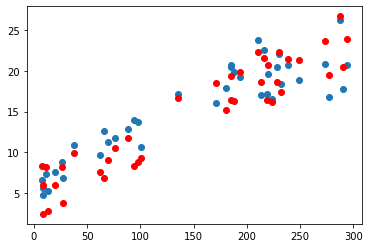

In [26]:
plt.scatter(x_val[:, 0], y_val)
plt.scatter(x_val[:, 0], y_pred, color='r')
plt.show()

## Newspaper 데이터 예측 그래프

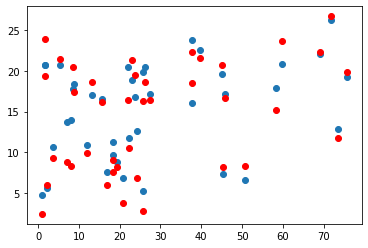

In [27]:
plt.scatter(x_val[:, 1], y_val)
plt.scatter(x_val[:, 1], y_pred, color='r')
plt.show()

### Radio 데이터 예측 그래프

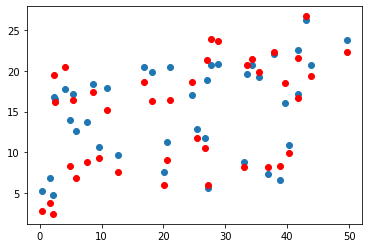

In [28]:
plt.scatter(x_val[:, 2], y_val)
plt.scatter(x_val[:, 2], y_pred, color='r')
plt.show()